<a href="https://colab.research.google.com/github/HomayounfarM/Optimization_algorithms/blob/main/Ex3_NTC_scipy_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is an example to minimize the cost function associated with a Logistic regression

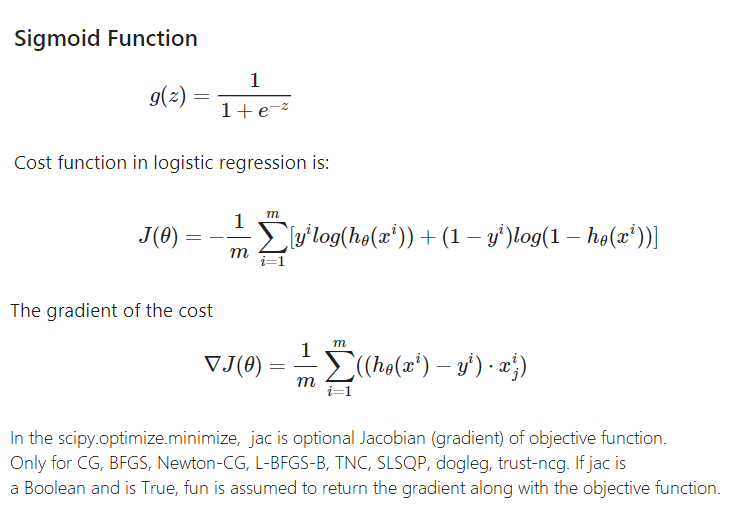

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
url = "https://raw.githubusercontent.com/HomayounfarM/Optimization_algorithms/main/Data/ex2_data1.txt"
dataset = pd.read_csv(url, header = None)
dataset.columns = ['exam_score_1', 'exam_score_2', 'label']
dataset.describe().T

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# definig sigmoid function
def sigmoid(z):
    z = np.array(z)
    return 1/(1+np.exp(-z))

# Plot of sigmoid function:
z = np.linspace(-10,10,100)
p = sigmoid(z)
plt.figure()
plt.plot(z,p)

In [ ]:
# define x, y and initial theta
m = len(dataset)
X = np.hstack((np.ones((m,1)),dataset[['exam_score_1', 'exam_score_2']].values))
y = np.array(dataset.label.values).reshape(-1,1)
theta_ini = np.zeros((X.shape[1]))

In [ ]:
# Cost Function and Gradient
def cost_function(theta, X, y):
    m = len(y)
    theta = theta[:, np.newaxis]
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h))- (1-y).T.dot(np.log(1-h)))
    
    diff_hy = h-y
    grad = (1/m) * diff_hy.T.dot(X)
    
    return J, grad

In [ ]:
# Optimize the cost function using scipy.optimize.minimize
import scipy.optimize as opt
opt_results = opt.minimize(cost_function, theta_ini, args=(X, y), method='TNC',
                           jac=True, options={'maxiter':400})
opt_results['x']
opt_results['fun']

In [ ]:
# plot the results
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=dataset, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_results['x'][2]*(opt_results['x'][1]*plot_x + opt_results['x'][0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show()